# 1. Introduction: Hospital Readmission Prediction 

In this final project, I aim to analyze hospital readmission data to develop predictive models using machine learning (ML) and artificial intelligence (AI) techniques. The dataset comprises 5,000 entries in the training set and 2,000 entries in the test set, with various fields such as age, gender, primary diagnosis, number of procedures, days in hospital, comorbidity score, discharge destination, and readmission status. By leveraging these data fields,I  will employ ML and AI algorithms to predict the likelihood of patient readmission. This analysis will help identify key factors influencing readmission rates and enable healthcare providers to implement targeted interventions to reduce readmissions, ultimately improving patient outcomes and optimizing hospital resources.



## 2. Exploratory Data Analysis and Data Cleaning 


In [9]:
import pandas as pd
from IPython.display import display

# Load the CSV files
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display the first few rows of each dataframe
print("Train DataFrame:")
display(train_df.head())

print("\nTest DataFrame:")
display(test_df.head())

print("\nSample Submission DataFrame:")
display(sample_submission.head())

# Display summary information of each dataframe
print("\nTrain DataFrame Info:")
train_df.info()

print("\nTest DataFrame Info:")
test_df.info()

print("\nSample Submission DataFrame Info:")
sample_submission.info()

# Check for missing values
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())

print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum())

print("\nMissing values in Sample Submission DataFrame:")
print(sample_submission.isnull().sum())


Train DataFrame:


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0



Test DataFrame:


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to
0,52,Male,Heart Disease,3,9,3,Home
1,47,Female,Diabetes,2,4,0,Skilled Nursing Facility
2,72,Female,Heart Disease,7,12,4,Home
3,18,Female,COPD,5,14,3,Home
4,32,Male,Heart Disease,9,2,4,Rehabilitation Facility



Sample Submission DataFrame:


,Patient_ID,readmitted
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1



Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                5000 non-null   int64 
 1   gender             5000 non-null   object
 2   primary_diagnosis  5000 non-null   object
 3   num_procedures     5000 non-null   int64 
 4   days_in_hospital   5000 non-null   int64 
 5   comorbidity_score  5000 non-null   int64 
 6   discharge_to       5000 non-null   object
 7   readmitted         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                2000 non-null   int64 
 1   gender             2000 non-null   object
 2   primary_diagnosis  2000 non-

In [11]:
print("\nSummary Statistics for Train Data:")
print(train_df.describe())


Summary Statistics for Train Data:
               age  num_procedures  days_in_hospital  comorbidity_score  \
count  5000.000000      5000.00000       5000.000000        5000.000000   
mean     53.299000         4.46100          7.396600           2.068600   
std      20.646851         2.88606          4.025587           1.422357   
min      18.000000         0.00000          1.000000           0.000000   
25%      36.000000         2.00000          4.000000           1.000000   
50%      53.000000         4.00000          7.000000           2.000000   
75%      71.000000         7.00000         11.000000           3.000000   
max      89.000000         9.00000         14.000000           4.000000   

        readmitted  
count  5000.000000  
mean      0.188000  
std       0.390751  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


### Exploratory Data Analysis Visualizations


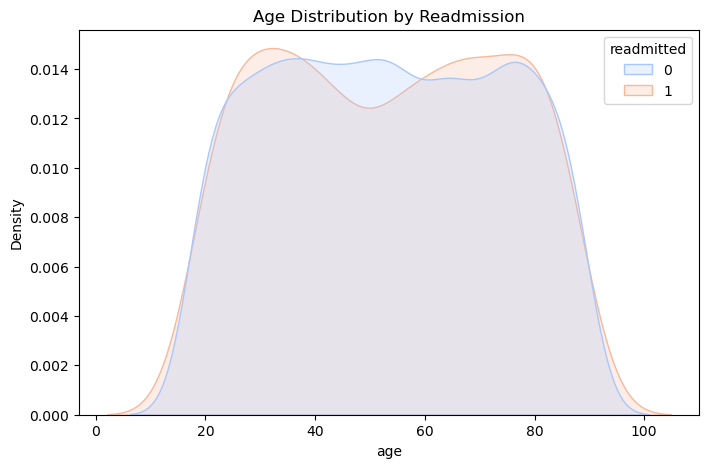

In [31]:
#  Age Distribution by Readmission
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train_df, x='age', hue='readmitted', common_norm=False, fill=True, palette='coolwarm')
plt.title('Age Distribution by Readmission')
plt.show()

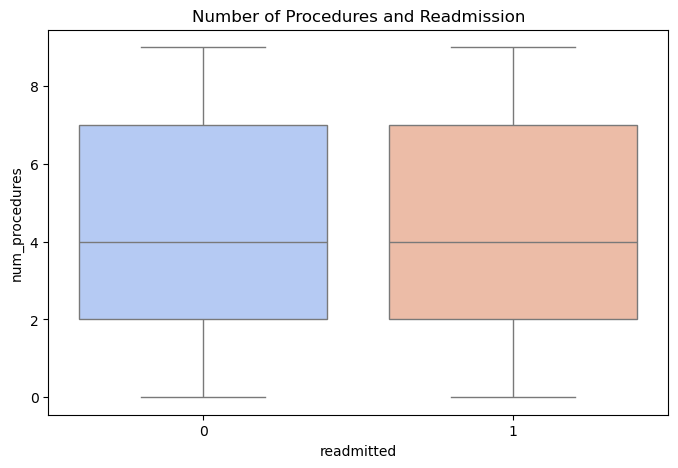

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='readmitted', y='num_procedures', hue='readmitted', data=train_df, palette='coolwarm', legend=False)
plt.title('Number of Procedures and Readmission')
plt.show()

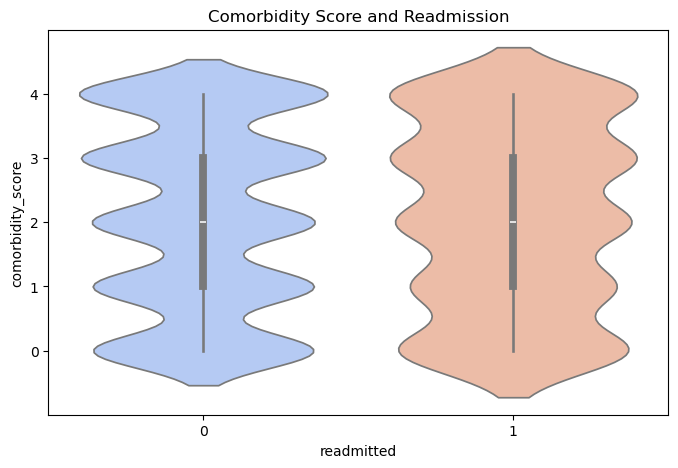

In [39]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='readmitted', y='comorbidity_score', hue='readmitted', data=train_df, palette='coolwarm', legend=False)
plt.title('Comorbidity Score and Readmission')
plt.show()

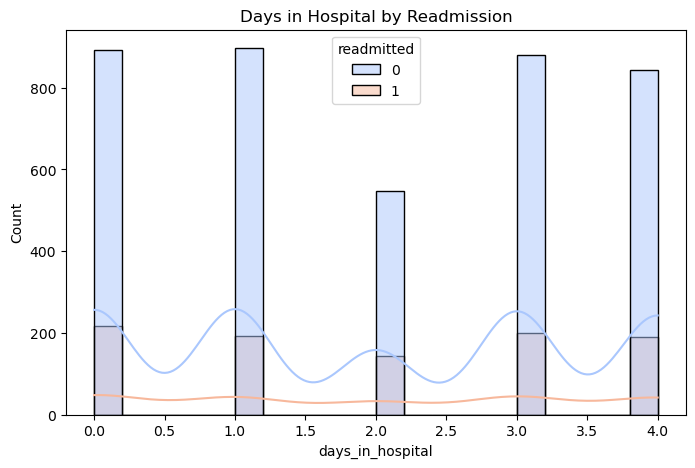

In [41]:
# 5. Days in Hospital vs. Readmission
plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='days_in_hospital', hue='readmitted', kde=True, bins=20, palette='coolwarm')
plt.title('Days in Hospital by Readmission')
plt.show()


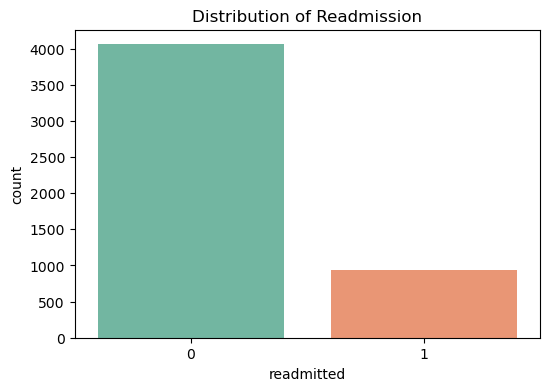

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', hue='readmitted', data=train_df, palette='Set2', legend=False)
plt.title("Distribution of Readmission")
plt.show()

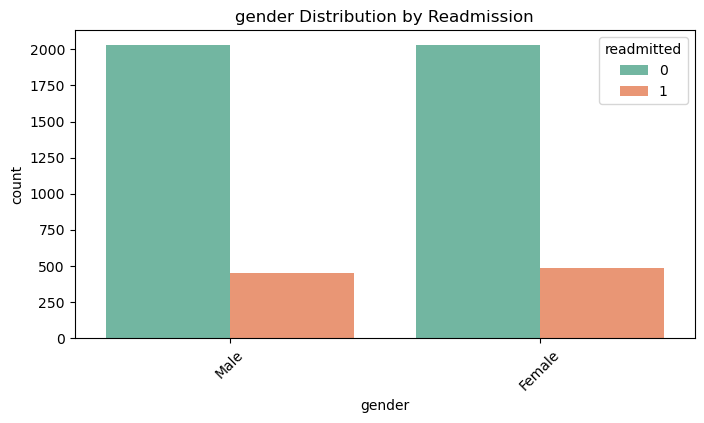

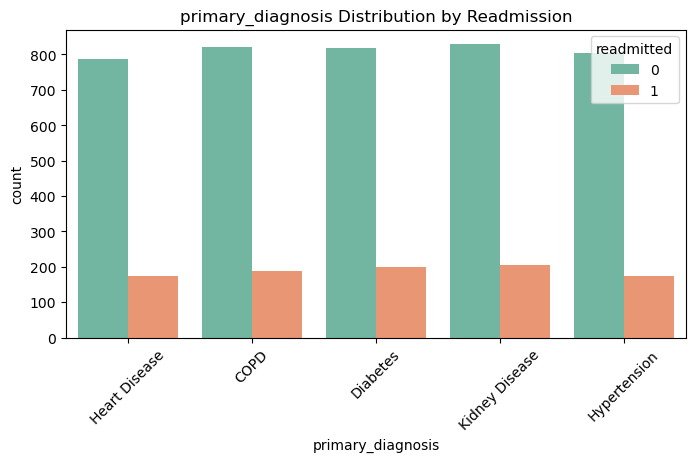

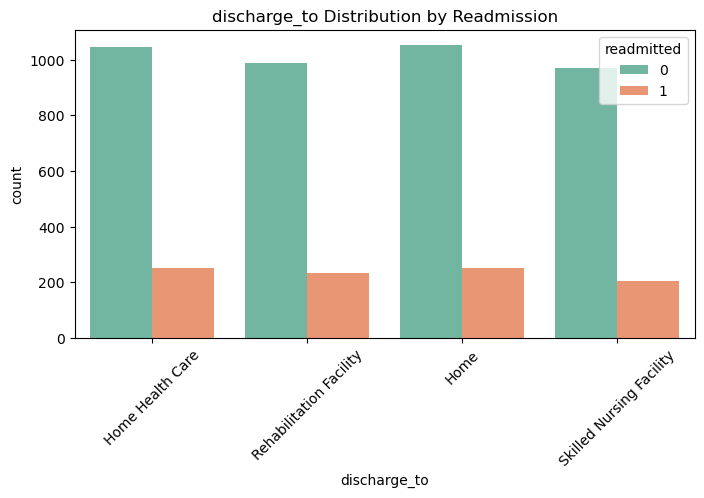

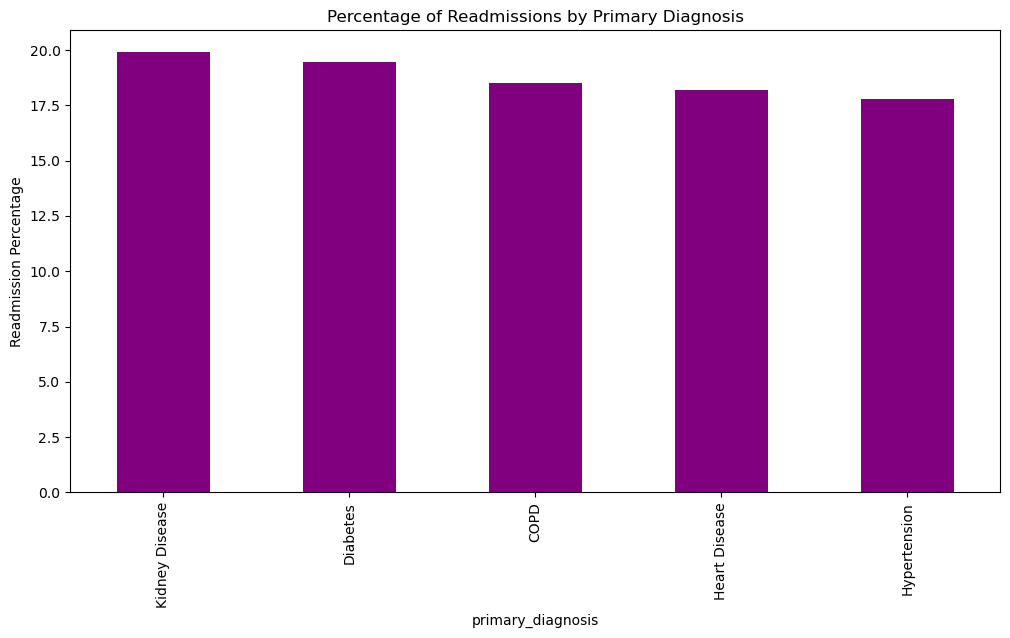

In [19]:
# Visualizing categorical features
def plot_categorical(feature):
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, data=train_df, hue='readmitted', palette='Set2')
    plt.title(f"{feature} Distribution by Readmission")
    plt.xticks(rotation=45)
    plt.show()

categorical_features = ['gender', 'primary_diagnosis', 'discharge_to']
for feature in categorical_features:
    plot_categorical(feature)

# Percentage of readmissions by primary diagnosis
readmission_pct = train_df.groupby('primary_diagnosis')['readmitted'].mean() * 100
plt.figure(figsize=(12,6))
readmission_pct.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title("Percentage of Readmissions by Primary Diagnosis")
plt.ylabel("Readmission Percentage")
plt.xticks(rotation=90)
plt.show()

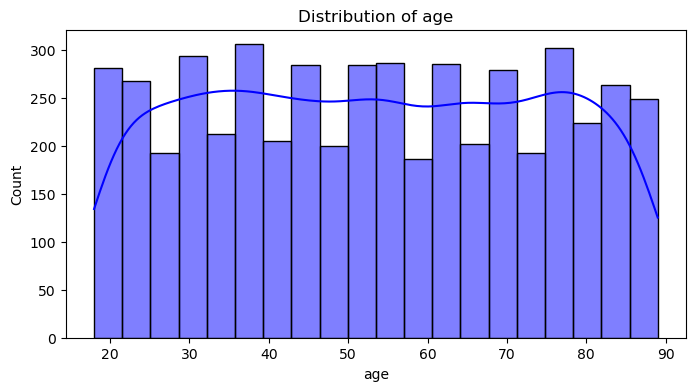

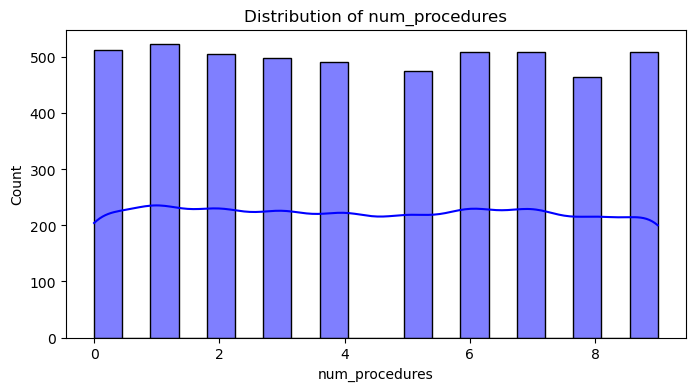

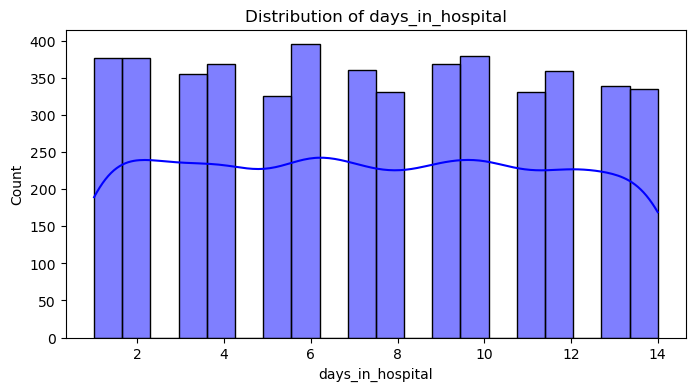

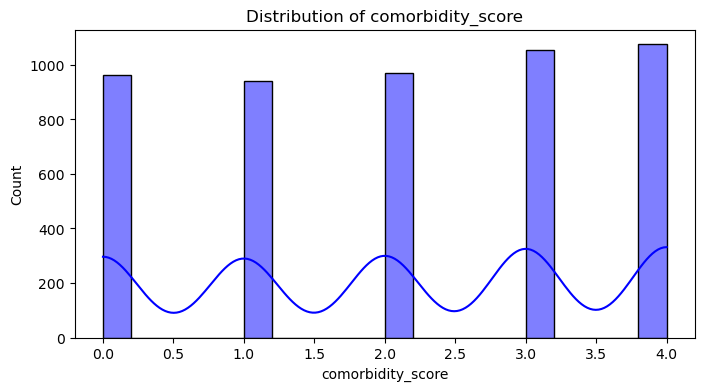

In [17]:
# Visualizing numerical features
def plot_numerical(feature):
    plt.figure(figsize=(8,4))
    sns.histplot(train_df[feature], bins=20, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()

numerical_features = ['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score']
for feature in numerical_features:
    plot_numerical(feature)

#  Revised Code to include some previous steps in one block of code and additional data check for missing values

Train DataFrame:


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0



Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                5000 non-null   int64 
 1   gender             5000 non-null   object
 2   primary_diagnosis  5000 non-null   object
 3   num_procedures     5000 non-null   int64 
 4   days_in_hospital   5000 non-null   int64 
 5   comorbidity_score  5000 non-null   int64 
 6   discharge_to       5000 non-null   object
 7   readmitted         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB

Missing values in Train DataFrame:
age                  0
gender               0
primary_diagnosis    0
num_procedures       0
days_in_hospital     0
comorbidity_score    0
discharge_to         0
readmitted           0
dtype: int64


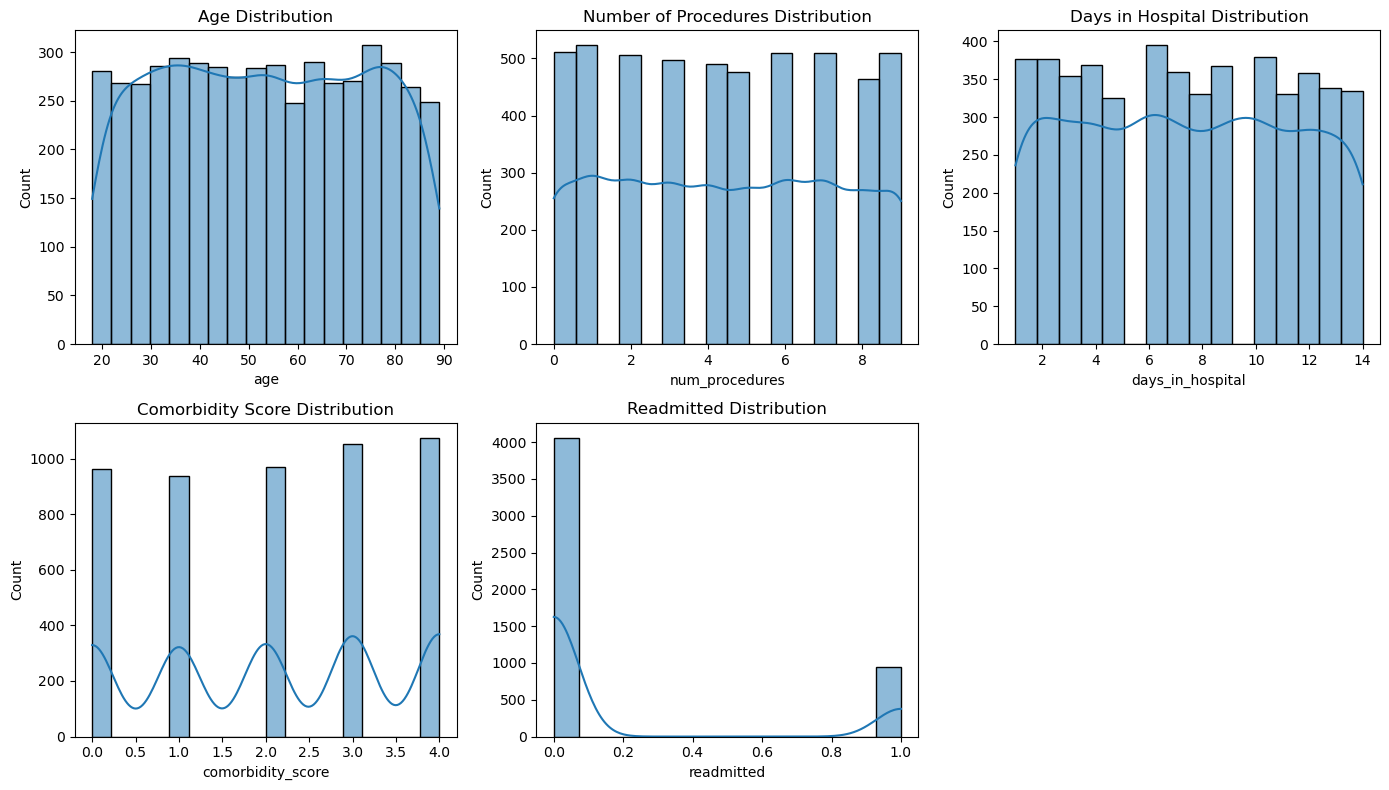

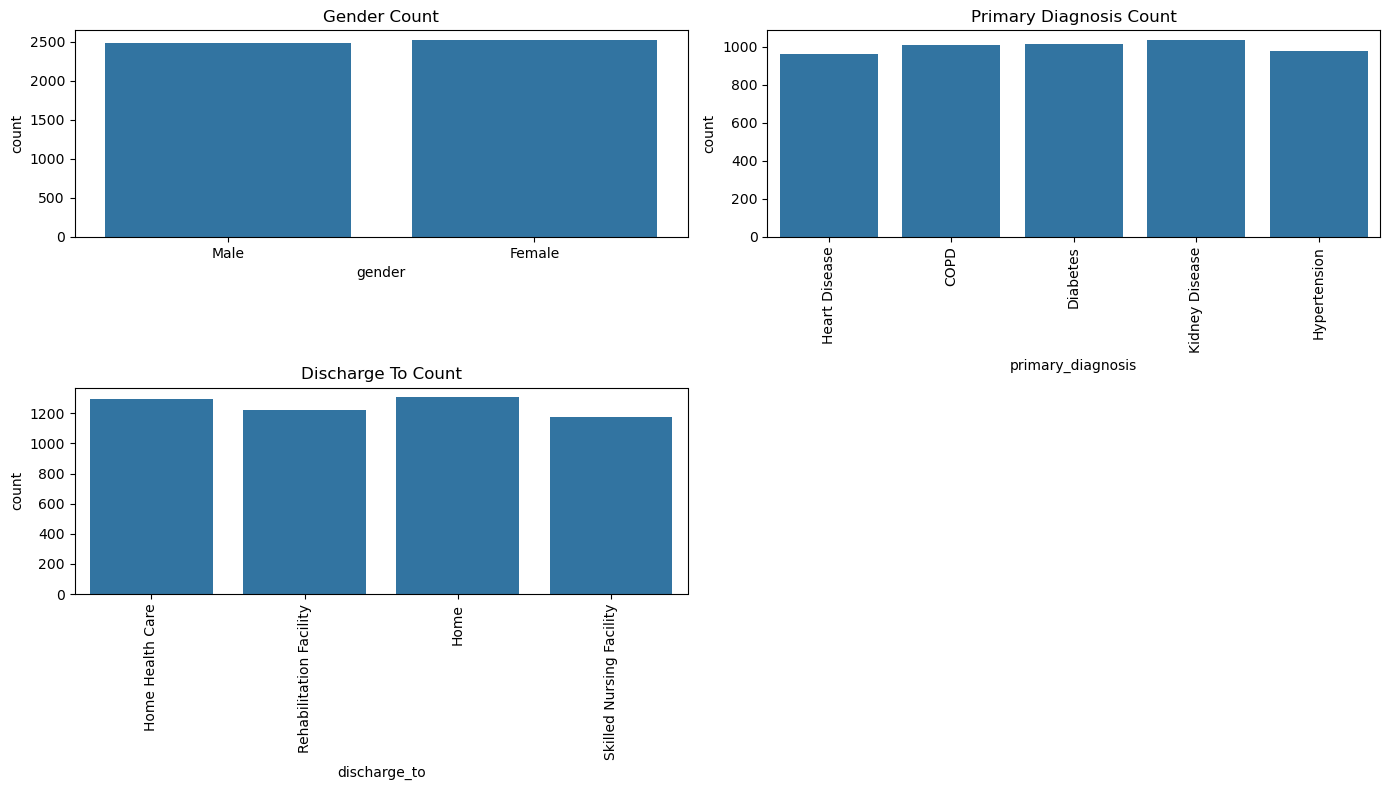

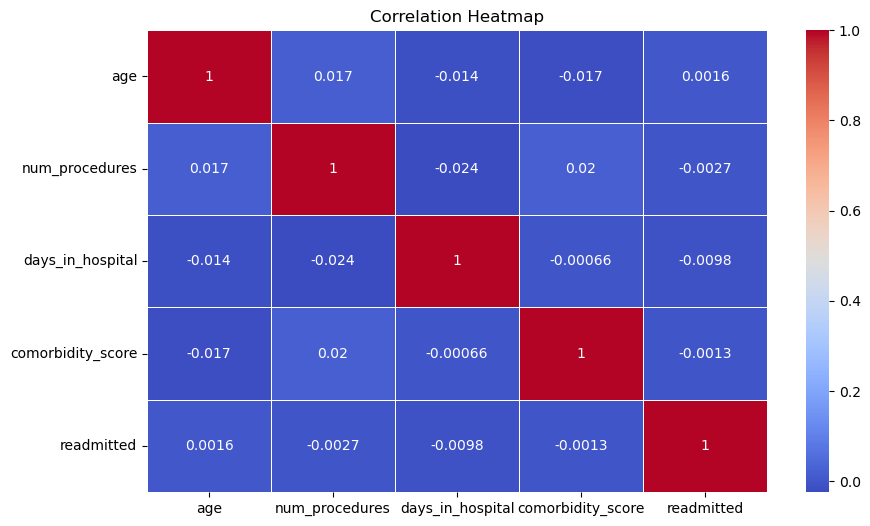

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
train_df = pd.read_csv('train_df.csv')

# Display the first few rows of the dataframe
print("Train DataFrame:")
display(train_df.head())

# Display summary information of the dataframe
print("\nTrain DataFrame Info:")
train_df.info()

# Check for missing values
print("\nMissing values in Train DataFrame:")
print(train_df.isnull().sum())

# Exploratory Data Analysis 

# 1. Distribution of numerical features
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(train_df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(train_df['num_procedures'], kde=True)
plt.title('Number of Procedures Distribution')

plt.subplot(2, 3, 3)
sns.histplot(train_df['days_in_hospital'], kde=True)
plt.title('Days in Hospital Distribution')

plt.subplot(2, 3, 4)
sns.histplot(train_df['comorbidity_score'], kde=True)
plt.title('Comorbidity Score Distribution')

plt.subplot(2, 3, 5)
sns.histplot(train_df['readmitted'], kde=True)
plt.title('Readmitted Distribution')

plt.tight_layout()
plt.show()

# 2. Count plots for categorical features
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=train_df, x='gender')
plt.title('Gender Count')

plt.subplot(2, 2, 2)
sns.countplot(data=train_df, x='primary_diagnosis')
plt.title('Primary Diagnosis Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.countplot(data=train_df, x='discharge_to')
plt.title('Discharge To Count')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



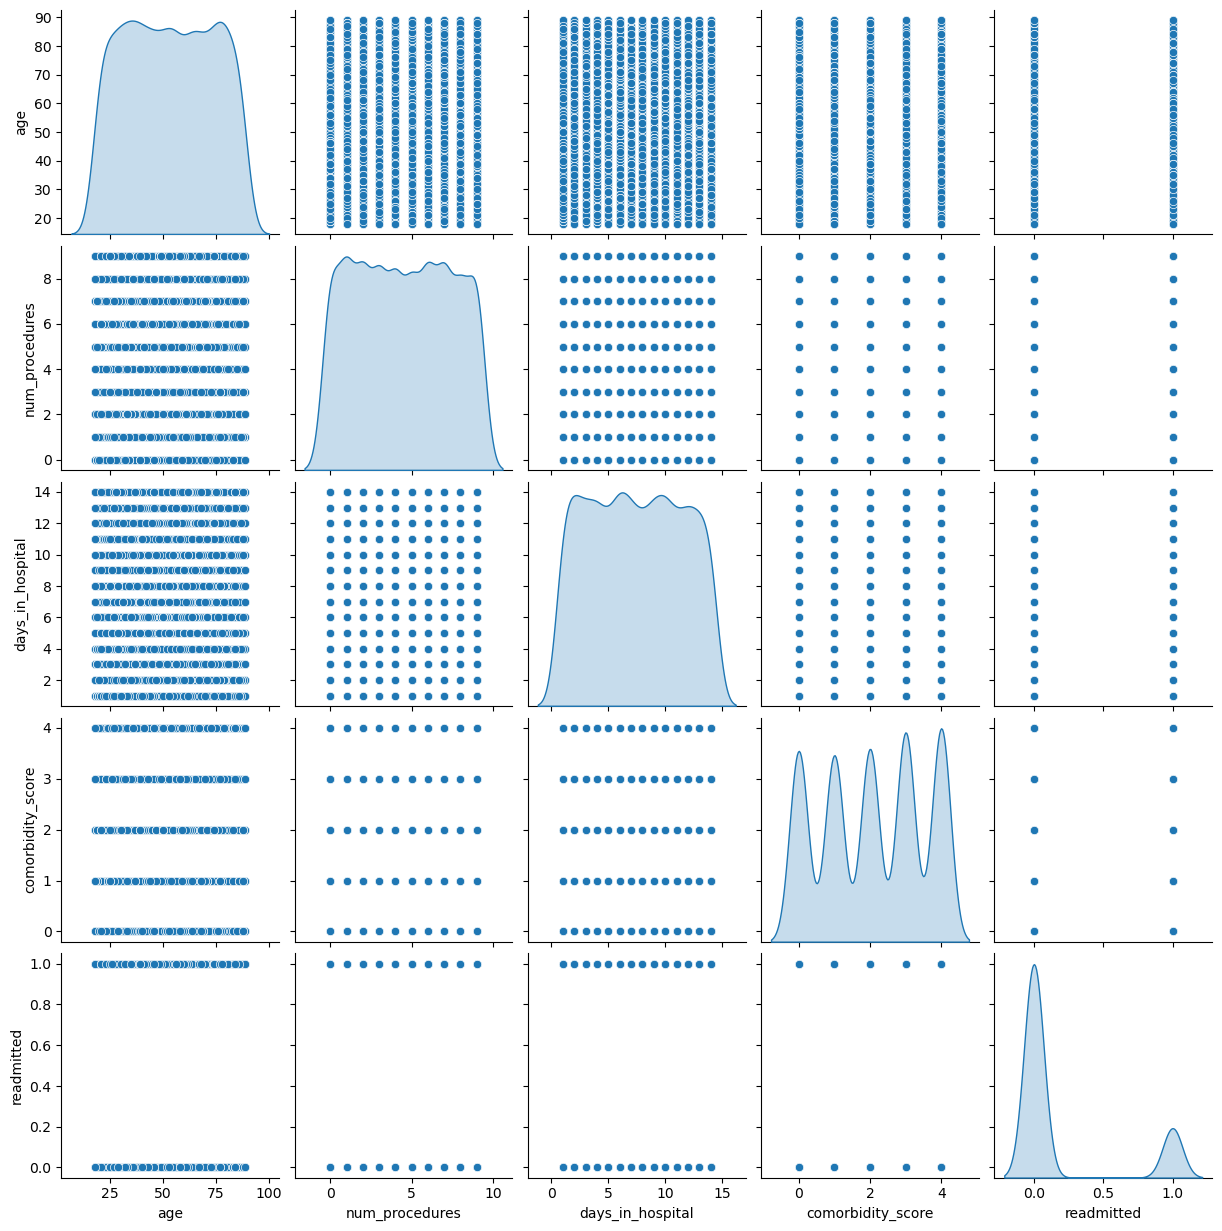

In [24]:
# Scatter plot matrix
sns.pairplot(train_df[['age', 'num_procedures', 'days_in_hospital', 'comorbidity_score', 'readmitted']], diag_kind='kde')
plt.show()

## Feature Distributions (Diagonals - KDE Plots)

- **Age** appears to have a relatively uniform distribution across the dataset.
- **Days in hospital** has a multimodal distribution, suggesting distinct patient groups.
- **Comorbidity score** shows a few distinct peaks, indicating certain common scores in the dataset.
- **Readmission** (binary variable) is highly imbalanced, with more patients not readmitted (0) than readmitted (1).

## Relationships Between Features (Scatter Plots)

- **No clear linear correlation** between most numerical variables. Data points appear discrete, likely due to categorical-like nature of num_procedures, days_in_hospital, and comorbidity_score.
- **Readmission vs. Other Features**: Readmitted patients (1) seem to be sparsely distributed across all variables, implying that readmission may not have strong direct correlations with individual features.
- **Days in hospital & Comorbidity Score**: There may be some clusters, which could indicate patient subgroups with similar conditions and hospital stays.

# Feature engineering and Baseline Model below

               age  num_procedures  days_in_hospital  comorbidity_score  \
count  5000.000000      5000.00000       5000.000000        5000.000000   
mean     53.299000         4.46100          7.396600           2.068600   
std      20.646851         2.88606          4.025587           1.422357   
min      18.000000         0.00000          1.000000           0.000000   
25%      36.000000         2.00000          4.000000           1.000000   
50%      53.000000         4.00000          7.000000           2.000000   
75%      71.000000         7.00000         11.000000           3.000000   
max      89.000000         9.00000         14.000000           4.000000   

        readmitted  
count  5000.000000  
mean      0.188000  
std       0.390751  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


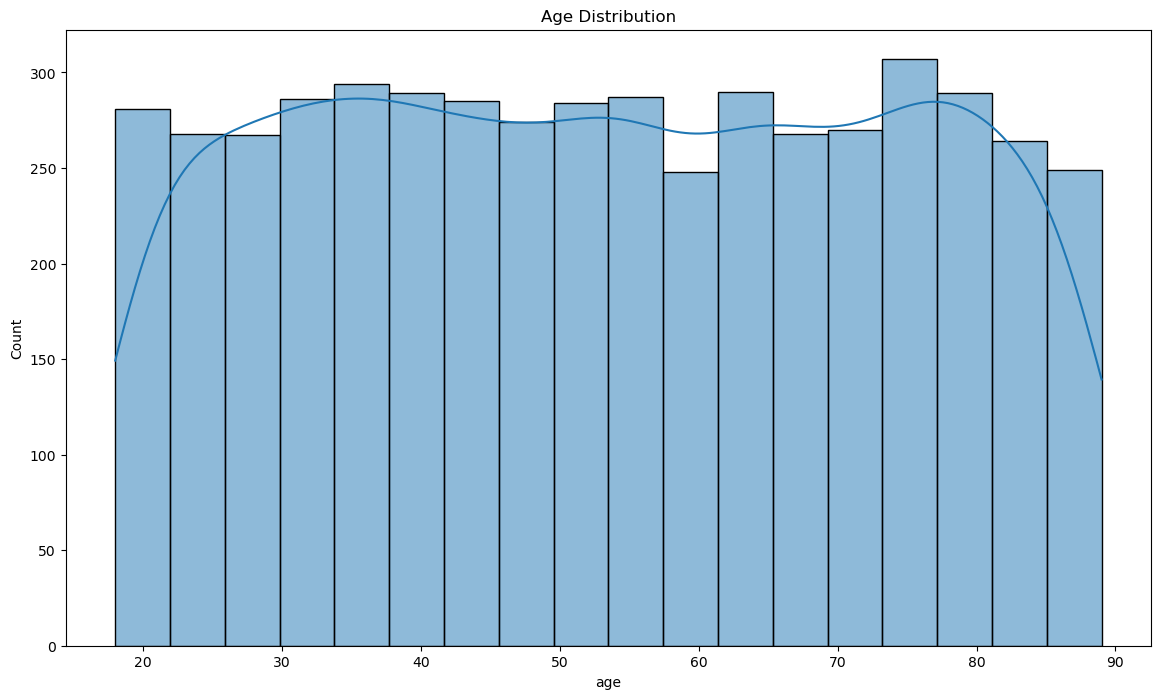

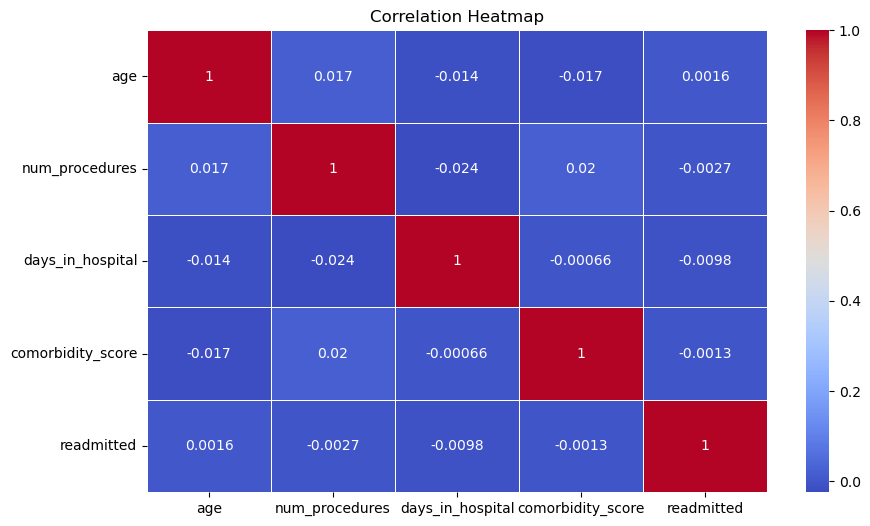

Accuracy: 0.826
Confusion Matrix:
 [[826   0]
 [174   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90       826
           1       0.00      0.00      0.00       174

    accuracy                           0.83      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.68      0.83      0.75      1000



C:\Users\S024131\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S024131\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\S024131\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_df = pd.read_csv('train_df.csv')


# Summary Statistics
print(train_df.describe())

# Visualizations
plt.figure(figsize=(14, 8))
sns.histplot(train_df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
train_df['age_group'] = pd.cut(train_df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# One-Hot Encoding for categorical variables
categorical_features = ['gender', 'primary_diagnosis', 'discharge_to', 'age_group']
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

# Baseline Model
# Splitting the data
X = train_df.drop(columns=['readmitted'])
y = train_df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Key Takeaways from correlation heatmap:
No strong correlations exist among features.
Readmission does not have a significant linear relationship with any individual variable.
Feature engineering (e.g., interaction terms, non-linear transformations) or adding new variables may be necessary to improve model performance.

# Key Observations:
Severe Class Imbalance Issue:

The confusion matrix:
[[826   0]
 [174   0]]
This means the model predicts all patients as non-readmitted (0) and never predicts readmission (1).

# Classification Report:

Precision, recall, and F1-score for class 1 (readmitted) are all 0.00, meaning the model completely fails to identify readmitted patients.
The macro average F1-score is 0.45, which is poor, reflecting this imbalance.

# Why Accuracy is Misleading:

Since most patients are not readmitted, the model simply predicts everyone as 0 and achieves 82.6% accuracy, but this is not useful for actual prediction.

# To improve recall for readmitted patients:

Handle Class Imbalance with Resampling:
Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

# Another baseline model below

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline model using RandomForestClassifier
X = train_df.drop(columns=['readmitted'])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

y = train_df['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_val)

print("\nBaseline Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



Baseline Model Performance:
Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       826
           1       0.08      0.01      0.01       174

    accuracy                           0.81      1000
   macro avg       0.45      0.50      0.45      1000
weighted avg       0.69      0.81      0.74      1000



**Baseline Model Performance**

My baseline model is achieving an overall accuracy of **81.5%**, but the recall for readmitted patients (1) is very low (**1%**). This means the model struggles to correctly identify readmitted cases, likely due to class imbalance, where non-readmitted patients dominate the dataset.

**Improvements:**

To improve recall for readmitted patients, I can try:

1. **Balancing the dataset** (e.g., SMOTE, undersampling, or class weighting).
2. **Tuning the RandomForest model** (adjust hyperparameters such as `class_weight='balanced'`).
3. **Using a different algorithm**, like `LogisticRegression` or `XGBoost`.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load the CSV file
train_df = pd.read_csv('train_df.csv')

train_df['age_group'] = pd.cut(train_df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66-100'])

# One-Hot Encoding for categorical variables
categorical_features = ['gender', 'primary_diagnosis', 'discharge_to', 'age_group']
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

# Splitting the data
X = train_df.drop(columns=['readmitted'])
y = train_df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.666
Confusion Matrix:
 [[618 208]
 [126  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       826
           1       0.19      0.28      0.22       174

    accuracy                           0.67      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.72      0.67      0.69      1000



# Explanation 

## Data Preparation

### Age Grouping
I grouped the ages in the dataset into categories: '0-18', '19-35', '36-50', '51-65', and '66-100'.

### One-Hot Encoding
I converted categorical variables such as gender, primary diagnosis, discharge destination, and age group into numerical format using one-hot encoding.

## Data Splitting

I split the dataset into training and testing sets with an 80-20 ratio.

## Handling Class Imbalance

### SMOTE (Synthetic Minority Over-sampling Technique)
I applied SMOTE to the training data to balance the classes by generating synthetic samples for the minority class (readmitted patients).

## Model Training

I trained a Logistic Regression model on the balanced training data.

## Model Evaluation

### Accuracy
My model achieved an accuracy of 66.6%, which indicates the proportion of correctly predicted instances out of the total instances.

### Confusion Matrix
- **True Negatives (618)**: Non-readmitted patients correctly identified.
- **False Positives (208)**: Non-readmitted patients incorrectly identified as readmitted.
- **False Negatives (126)**: Readmitted patients incorrectly identified as non-readmitted.
- **True Positives (48)**: Readmitted patients correctly identified.

### Classification Report
- **Precision for Class 0 (Non-readmitted)**: 0.83
- **Recall for Class 0**: 0.75
- **F1-Score for Class 0**: 0.79
- **Precision for Class 1 (Readmitted)**: 0.19
- **Recall for Class 1**: 0.28
- **F1-Score for Class 1**: 0.22
- **Overall Accuracy**: 0.67
- **Macro Average**: 0.51 (average performance across classes)
- **Weighted Average**: 0.69 (average performance weighted by support)

## Key Observations

- My model has a high precision and recall for non-readmitted patients but struggles with readmitted patients.
- The low recall for readmitted patients (1) indicates that my model misses many actual readmitted cases, which is a critical issue in this context.

## Next Steps for Improvement

- Further balancing the dataset or trying different techniques to handle class imbalance.
- Experimenting with different algorithms or tuning hyperparameters to improve recall for readmitted patients.

In [29]:
# Handling Class Imbalance with SMOTE
X = train_df.drop(columns=['readmitted'])

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical to numerical

y = train_df['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Baseline model using RandomForestClassifier
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
baseline_model.fit(X_train_resampled, y_train_resampled)
y_pred = baseline_model.predict(X_val)

print("\nBaseline Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



Baseline Model Performance:
Accuracy: 0.772
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       826
           1       0.16      0.07      0.10       174

    accuracy                           0.77      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.71      0.77      0.74      1000



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Load the data
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Encode categorical variables
train_df = pd.get_dummies(train_df, drop_first=True)

# Feature Engineering: Binning numerical features
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_df[['days_in_hospital', 'comorbidity_score']] = binner.fit_transform(train_df[['days_in_hospital', 'comorbidity_score']])

# Handling Class Imbalance with SMOTE
X = train_df.drop(columns=['readmitted'])
y = train_df['readmitted']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
rf_best = grid_search.best_estimator_

# Train and evaluate RandomForestClassifier
rf_best.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_best.predict(X_val)

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

# Logistic Regression as an alternative baseline
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_val)

print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_val, y_pred_lr))
print(classification_report(y_val, y_pred_lr))

C:\Users\S024131\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(



Random Forest Model Performance:
Accuracy: 0.789
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       826
           1       0.11      0.03      0.05       174

    accuracy                           0.79      1000
   macro avg       0.46      0.49      0.46      1000
weighted avg       0.70      0.79      0.74      1000


Logistic Regression Model Performance:
Accuracy: 0.498
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       826
           1       0.14      0.38      0.21       174

    accuracy                           0.50      1000
   macro avg       0.47      0.45      0.42      1000
weighted avg       0.69      0.50      0.56      1000

